# Bank Churn Prediction Neural Networks
## Anish Indukur

Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )



Problem Statement: Create a neural network that is able to help the bank predict if a customer will leave within the next 6 months.

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from scipy.stats import zscore

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from tensorflow.keras import optimizers

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',200)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Importing and Cleaning Data

In [71]:
bankData = pd.read_csv('/Users/anish/Desktop/School/AIML/Datasets/Churn.csv')
bankData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


No missing values in the dataset

In [72]:
bankData.shape

(10000, 14)

In [73]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
bankData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
bankData.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [76]:
catColumns = ('Surname', 'Geography', 'Gender')
for i in catColumns:
    bankData[i] = bankData[i].astype('category')

In [77]:
for i in bankData.select_dtypes(include=['category']):
    print(bankData[i].value_counts())
    print('-'*40)
    

Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Etheridge      1
Milliner       1
Milligan       1
Eva            1
Kuykendall     1
Name: Surname, Length: 2932, dtype: int64
----------------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------


In [78]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


## Data Analysis

In [79]:
#Function to plot a boxplot and a histogram together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [80]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [81]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 986.3 KB


In [82]:
numericalCols = ('RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'EstimatedSalary')

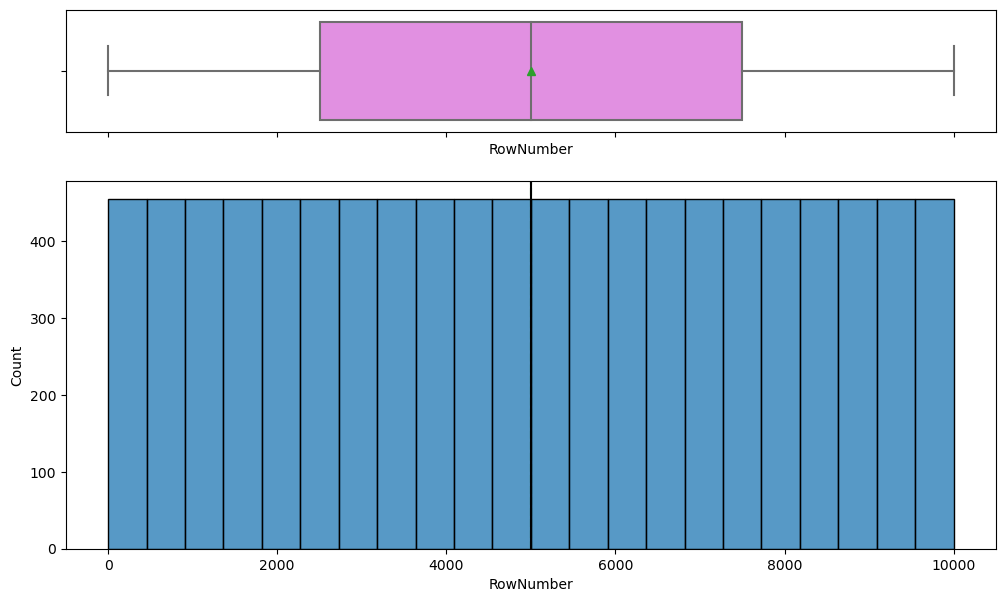

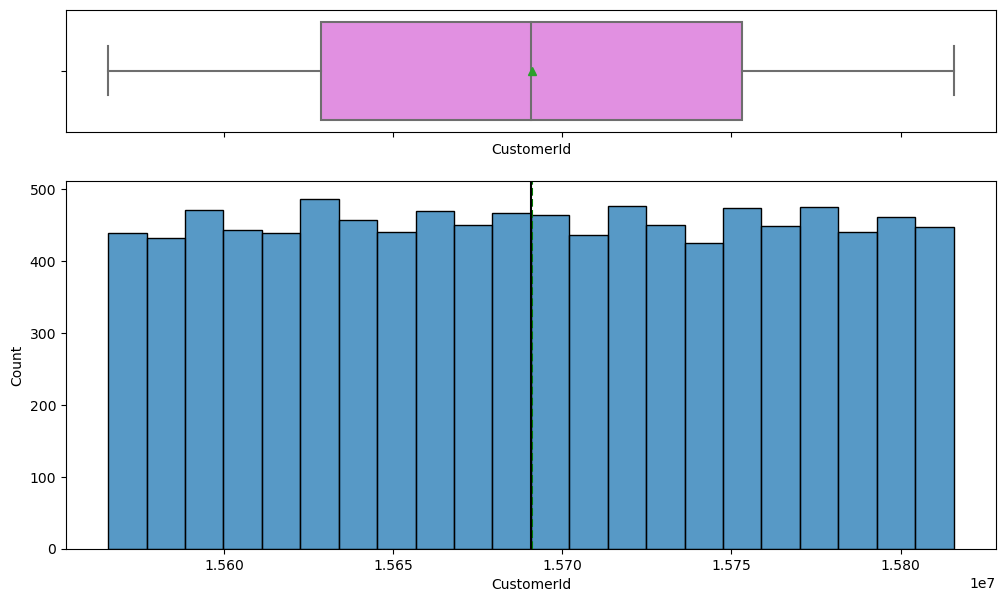

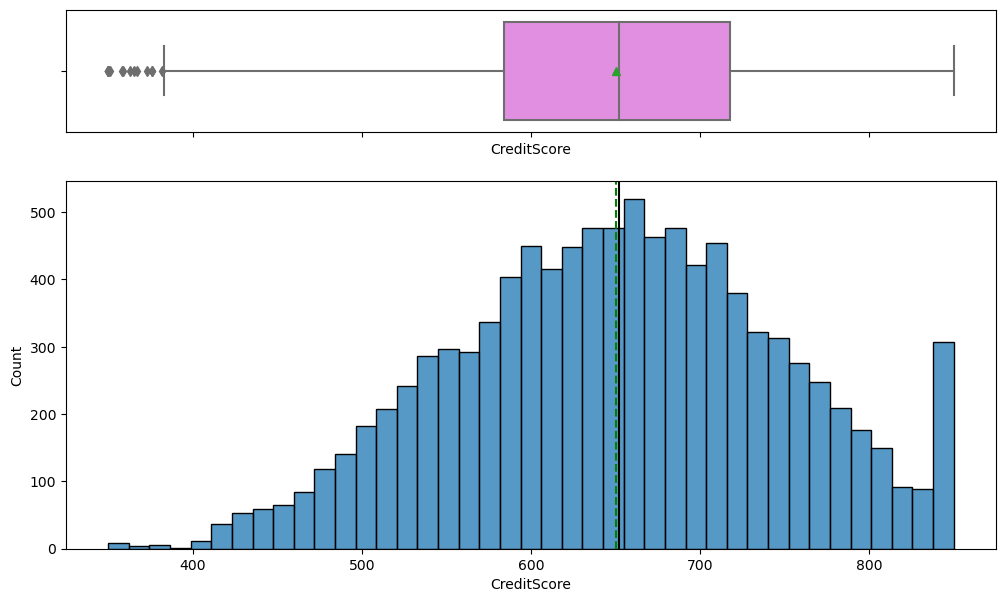

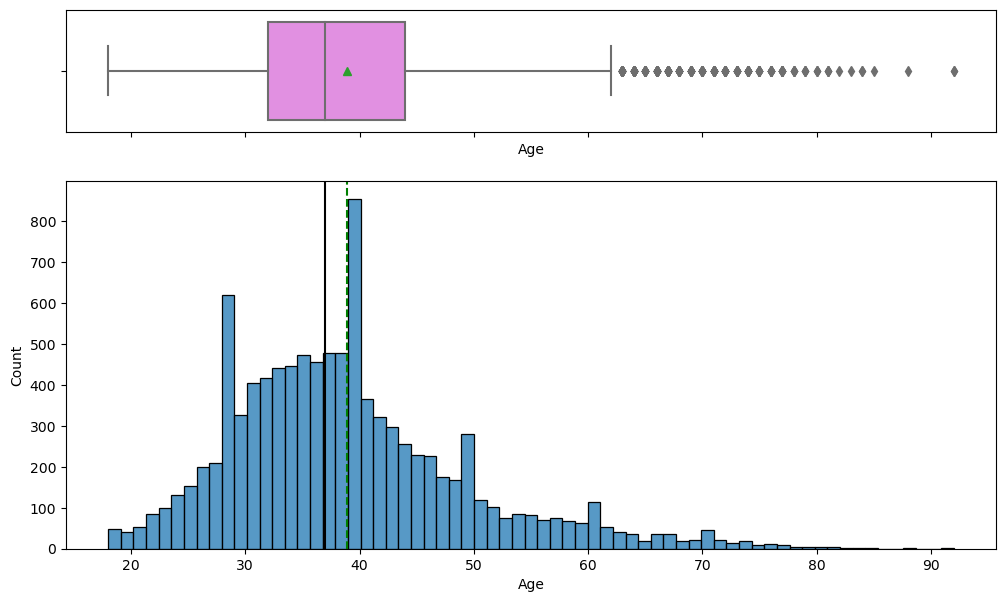

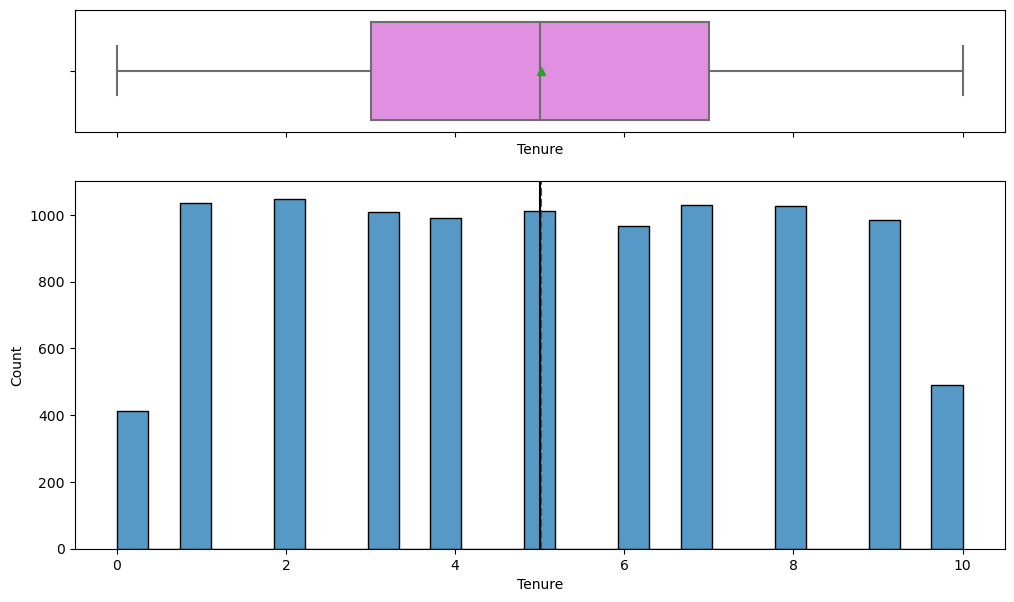

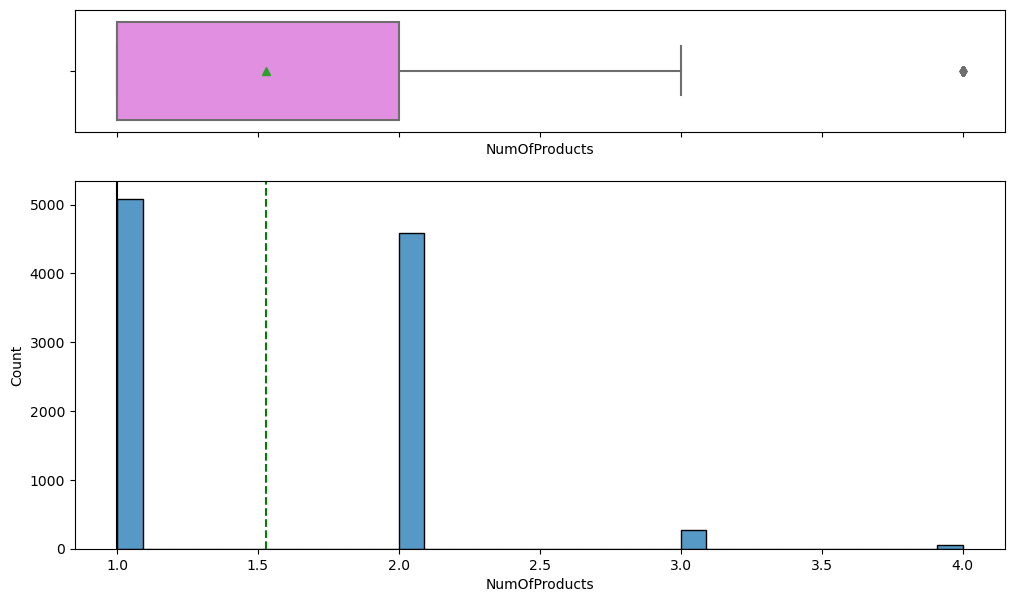

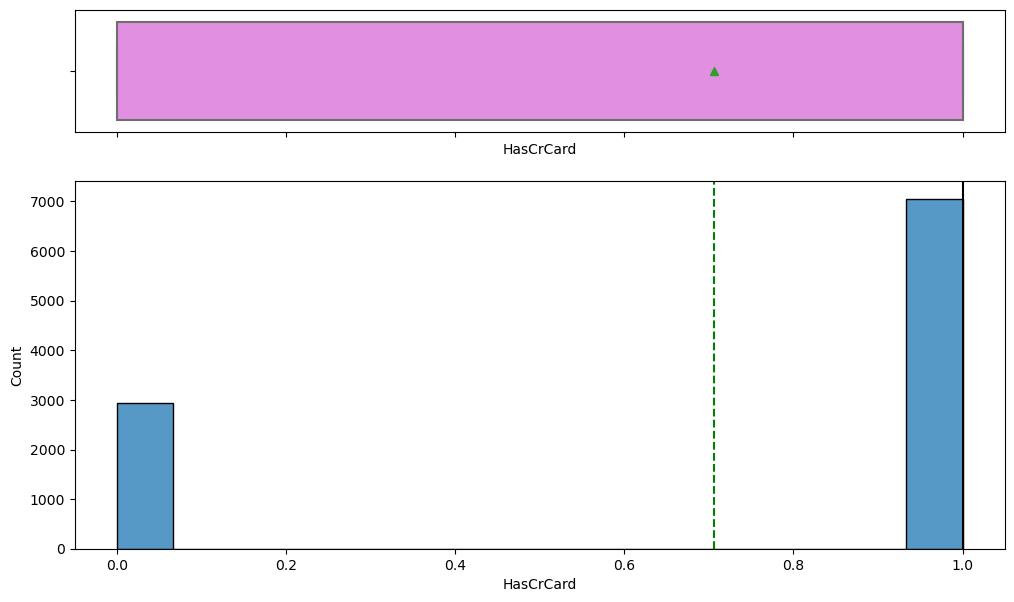

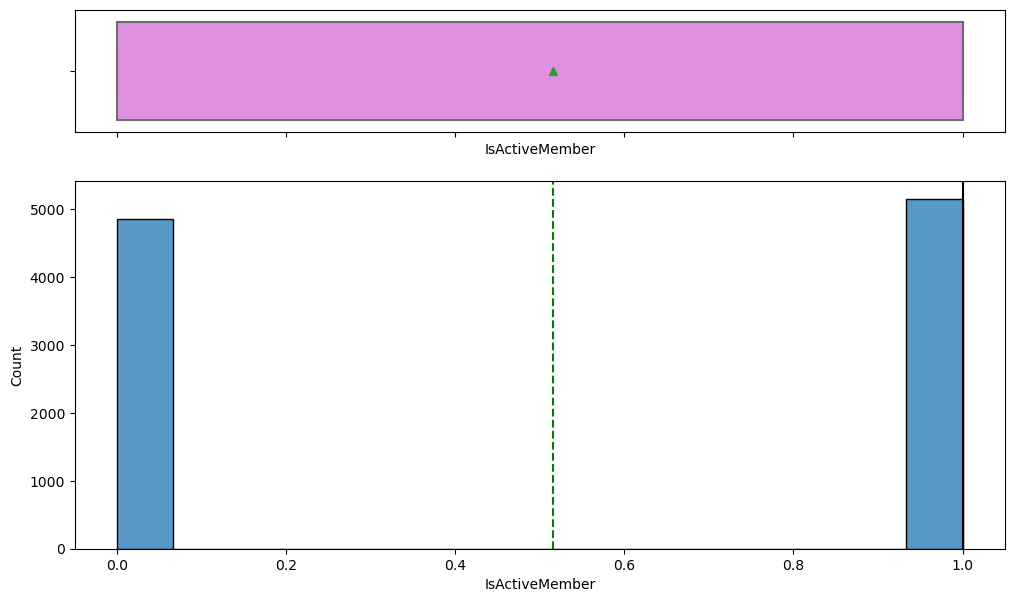

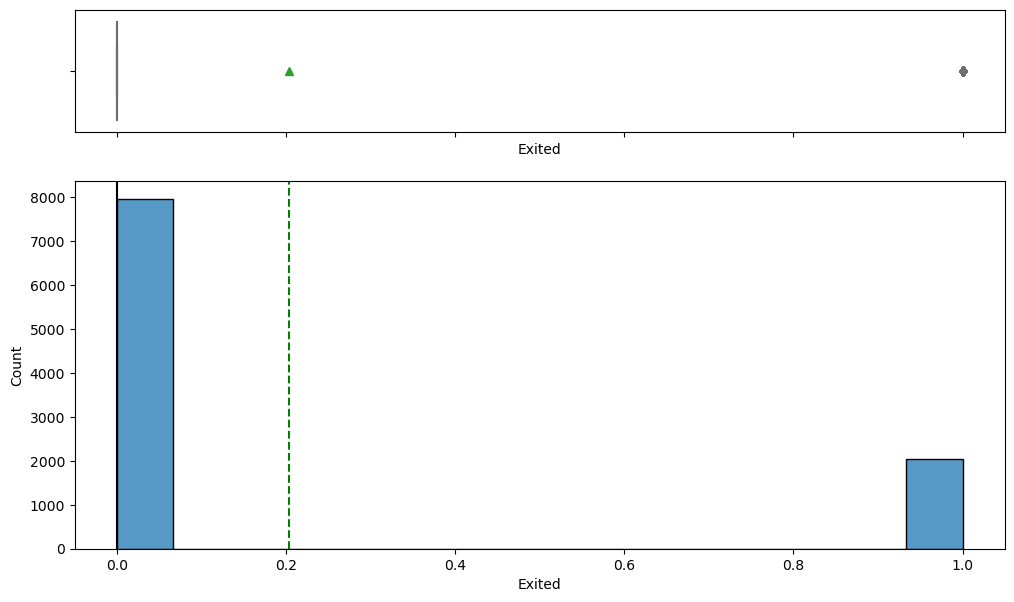

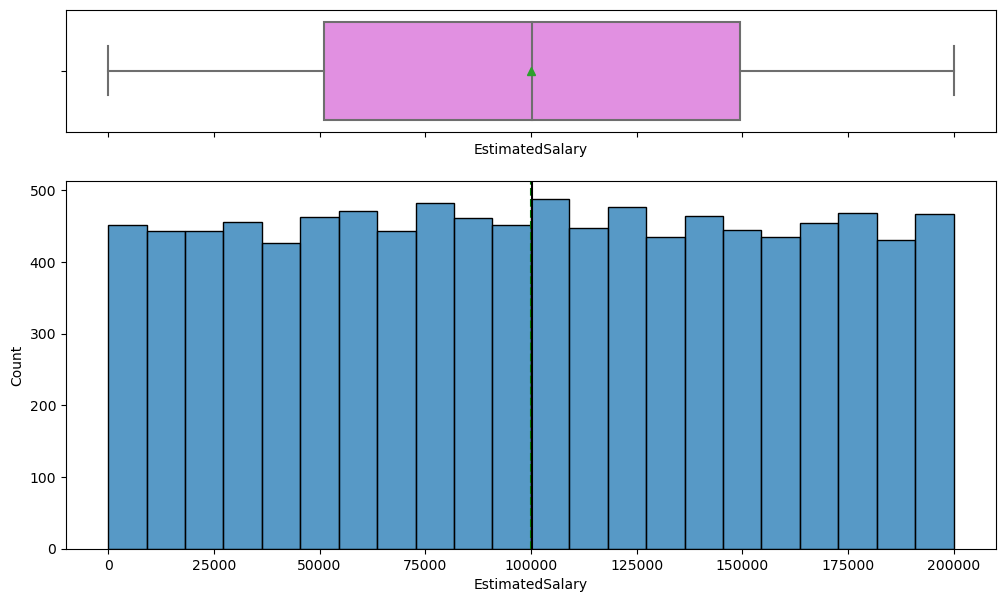

In [83]:
for i in numericalCols:
    histogram_boxplot(data=bankData, feature = i)

<Axes: >

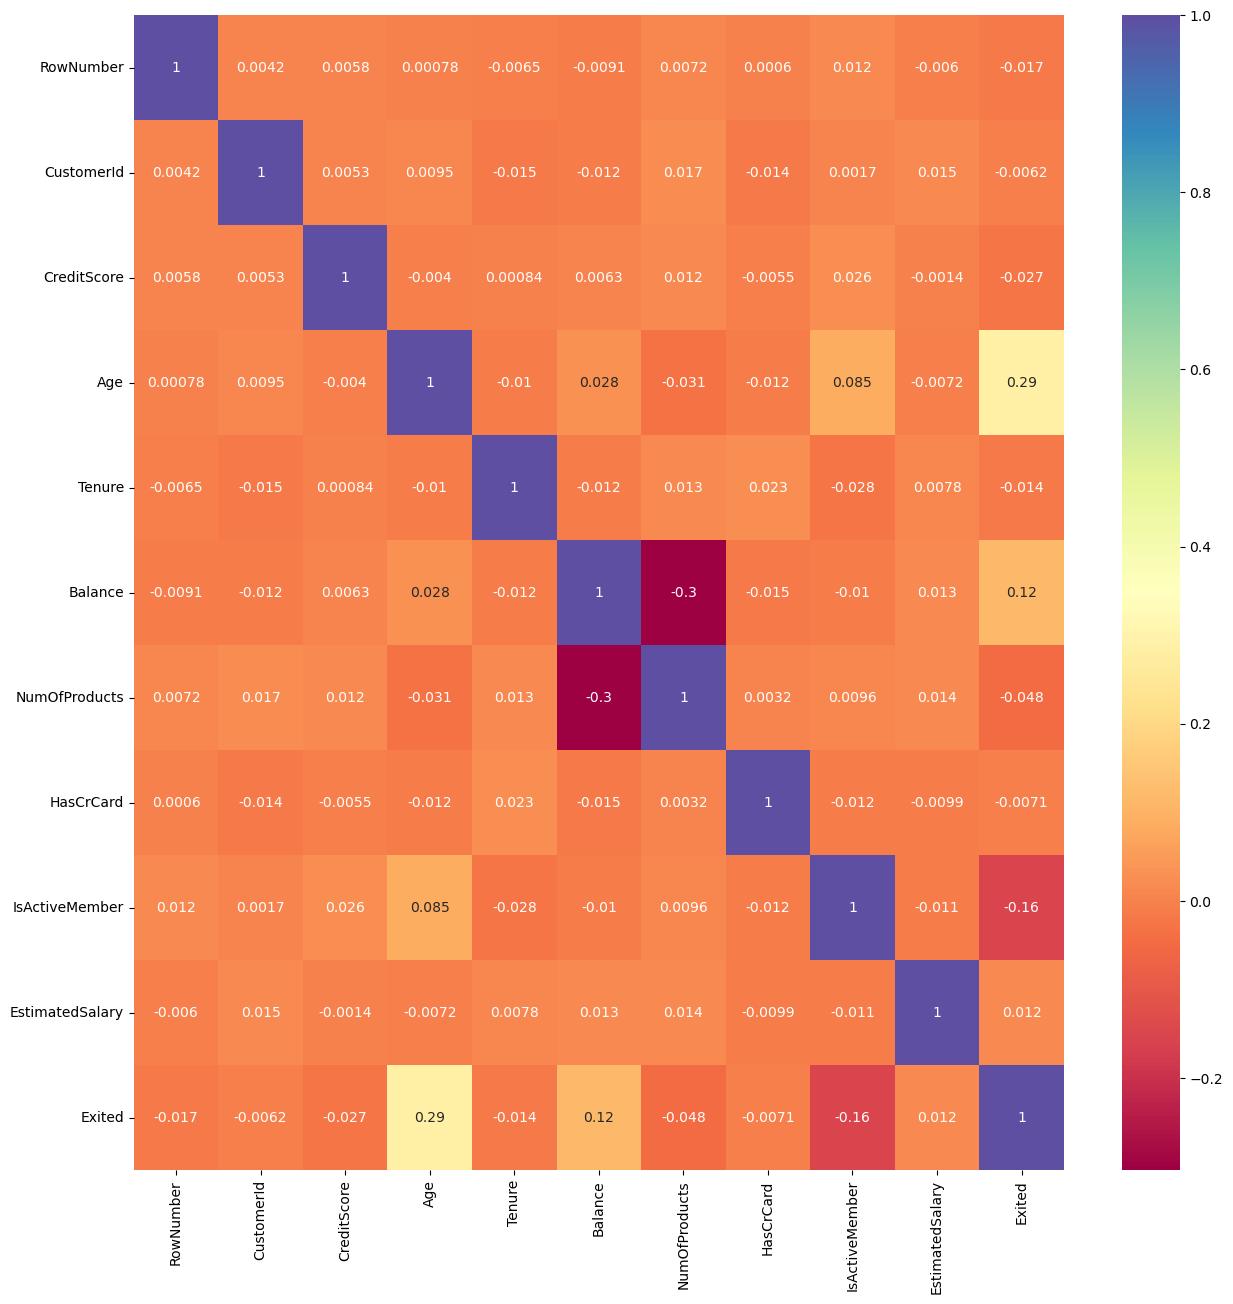

In [84]:
plt.figure(figsize=(15,15))
sns.heatmap(data=bankData.corr(), annot=True, cmap='Spectral')

Observations:
* Age has a slight correlation to whether the customer left the bank or not.
* Balance also has a slight positive correlation to whether the customer left.

## Model Building

In [85]:
modelingData = bankData
modelingData = modelingData.drop('RowNumber',axis = 1)
modelingData = modelingData.drop('CustomerId',axis = 1)
modelingData = modelingData.drop('Surname',axis = 1)

In [86]:
modelingData = pd.get_dummies(modelingData, drop_first=True)
x = modelingData.drop('Exited', axis = 1)
y = modelingData['Exited']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

scaler = MinMaxScaler()
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

<b>Building ANN using tanh, sigmoid for final layer, and sgd as optimizer.</b>

In [87]:
import random
from tensorflow.keras.layers import BatchNormalization
np.random.seed(120)
tf.random.set_seed(120)

shape = X_train.shape[1]
model1 = Sequential()
model1.add(Dense(6, activation = 'tanh', input_shape = (shape,)))
model1.add(Dense(4, activation = 'tanh'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(4, activation = 'tanh'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))

adam = optimizers.legacy.Adamax(lr=1e-3)
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [88]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                        

Running only for 75 epochs since it seems that the earlier model overfit after that point.

In [89]:
history_2 = model1.fit(X_train, 
                    y_train,
                    validation_split=0.2, 
                    epochs=75, 
                    verbose=2)

Epoch 1/75
175/175 - 0s - loss: 0.6911 - accuracy: 0.6264 - val_loss: 0.5475 - val_accuracy: 0.7993 - 451ms/epoch - 3ms/step
Epoch 2/75
175/175 - 0s - loss: 0.5602 - accuracy: 0.7536 - val_loss: 0.5133 - val_accuracy: 0.7993 - 104ms/epoch - 595us/step
Epoch 3/75
175/175 - 0s - loss: 0.5352 - accuracy: 0.7857 - val_loss: 0.5035 - val_accuracy: 0.7993 - 103ms/epoch - 587us/step
Epoch 4/75
175/175 - 0s - loss: 0.5203 - accuracy: 0.7962 - val_loss: 0.4998 - val_accuracy: 0.7993 - 101ms/epoch - 580us/step
Epoch 5/75
175/175 - 0s - loss: 0.5160 - accuracy: 0.7977 - val_loss: 0.4985 - val_accuracy: 0.7993 - 101ms/epoch - 580us/step
Epoch 6/75
175/175 - 0s - loss: 0.5086 - accuracy: 0.7986 - val_loss: 0.4979 - val_accuracy: 0.7993 - 100ms/epoch - 569us/step
Epoch 7/75
175/175 - 0s - loss: 0.5077 - accuracy: 0.7986 - val_loss: 0.4971 - val_accuracy: 0.7993 - 101ms/epoch - 579us/step
Epoch 8/75
175/175 - 0s - loss: 0.5079 - accuracy: 0.7984 - val_loss: 0.4965 - val_accuracy: 0.7993 - 99ms/epoch 

Epoch 66/75
175/175 - 0s - loss: 0.4577 - accuracy: 0.8007 - val_loss: 0.4328 - val_accuracy: 0.7993 - 103ms/epoch - 588us/step
Epoch 67/75
175/175 - 0s - loss: 0.4530 - accuracy: 0.7961 - val_loss: 0.4322 - val_accuracy: 0.7993 - 102ms/epoch - 581us/step
Epoch 68/75
175/175 - 0s - loss: 0.4536 - accuracy: 0.7971 - val_loss: 0.4315 - val_accuracy: 0.7993 - 99ms/epoch - 564us/step
Epoch 69/75
175/175 - 0s - loss: 0.4548 - accuracy: 0.7986 - val_loss: 0.4309 - val_accuracy: 0.7993 - 98ms/epoch - 557us/step
Epoch 70/75
175/175 - 0s - loss: 0.4569 - accuracy: 0.7955 - val_loss: 0.4310 - val_accuracy: 0.7993 - 97ms/epoch - 557us/step
Epoch 71/75
175/175 - 0s - loss: 0.4511 - accuracy: 0.8005 - val_loss: 0.4305 - val_accuracy: 0.7993 - 99ms/epoch - 564us/step
Epoch 72/75
175/175 - 0s - loss: 0.4533 - accuracy: 0.7959 - val_loss: 0.4295 - val_accuracy: 0.7993 - 98ms/epoch - 561us/step
Epoch 73/75
175/175 - 0s - loss: 0.4542 - accuracy: 0.7946 - val_loss: 0.4291 - val_accuracy: 0.7993 - 98ms/e

In [90]:
from tensorflow.keras import backend
backend.clear_session()

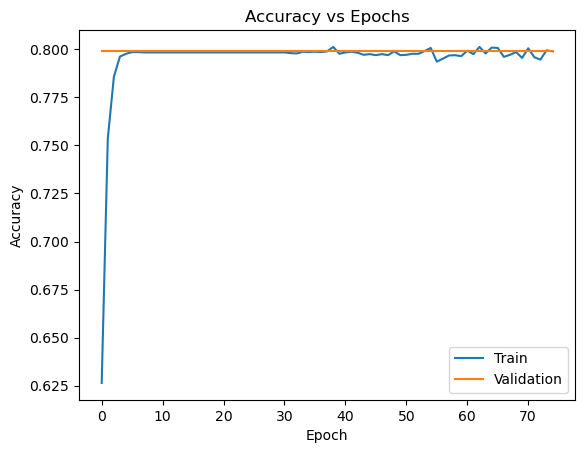

In [91]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [92]:
predictions = model1.predict(X_test)

94/94 [==============================] - 0s 433us/step


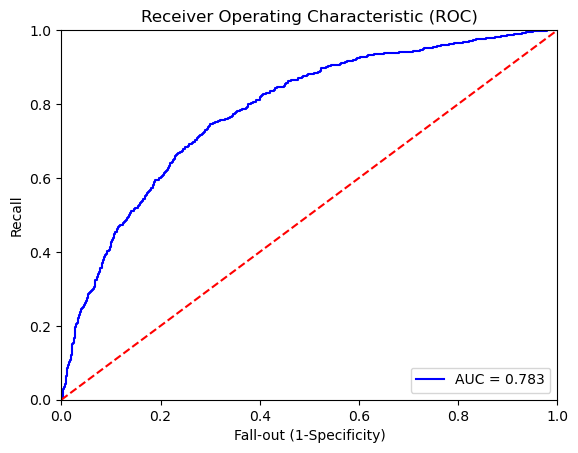

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

94/94 [==============================] - 0s 390us/step


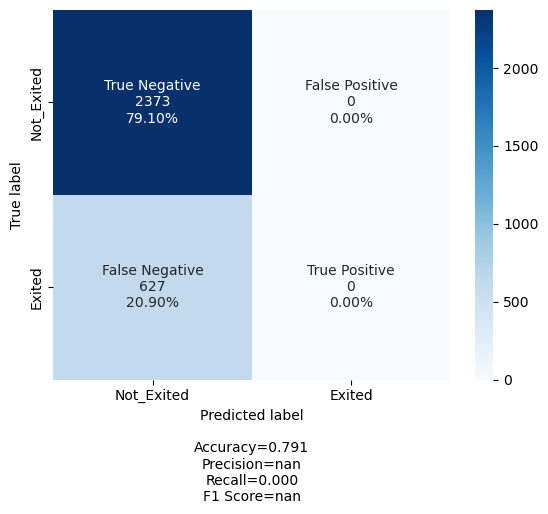

In [94]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Since this model has a large number of false negatives, the next model will try to optimize to lower the amount of false negatives.

<b>Building ANN using tanh for dense layers, and sigmoid as final activation. Optimizer is adam. This model will have more neurons in each layer to add complexity.</b>

In [95]:
import random
from tensorflow.keras.layers import BatchNormalization
np.random.seed(108)
tf.random.set_seed(108)

shape = X_train.shape[1]
model = Sequential()
model.add(Dense(6, activation = 'tanh', input_shape = (shape,)))
model.add(Dense(12, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(12, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(12, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adamax(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                        

In [97]:
history_1 = model.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=200, 
                    verbose=2)

Epoch 1/200
197/197 - 1s - loss: 0.7439 - accuracy: 0.5614 - val_loss: 0.5862 - val_accuracy: 0.7357 - 661ms/epoch - 3ms/step
Epoch 2/200
197/197 - 0s - loss: 0.6180 - accuracy: 0.6784 - val_loss: 0.5368 - val_accuracy: 0.7800 - 134ms/epoch - 683us/step
Epoch 3/200
197/197 - 0s - loss: 0.5606 - accuracy: 0.7479 - val_loss: 0.5204 - val_accuracy: 0.7800 - 133ms/epoch - 675us/step
Epoch 4/200
197/197 - 0s - loss: 0.5336 - accuracy: 0.7714 - val_loss: 0.5148 - val_accuracy: 0.7800 - 134ms/epoch - 679us/step
Epoch 5/200
197/197 - 0s - loss: 0.5271 - accuracy: 0.7846 - val_loss: 0.5133 - val_accuracy: 0.7800 - 130ms/epoch - 661us/step
Epoch 6/200
197/197 - 0s - loss: 0.5233 - accuracy: 0.7897 - val_loss: 0.5136 - val_accuracy: 0.7800 - 131ms/epoch - 663us/step
Epoch 7/200
197/197 - 0s - loss: 0.5180 - accuracy: 0.7943 - val_loss: 0.5126 - val_accuracy: 0.7800 - 131ms/epoch - 666us/step
Epoch 8/200
197/197 - 0s - loss: 0.5087 - accuracy: 0.7986 - val_loss: 0.5105 - val_accuracy: 0.7800 - 131

Epoch 65/200
197/197 - 0s - loss: 0.4314 - accuracy: 0.7983 - val_loss: 0.4652 - val_accuracy: 0.7800 - 138ms/epoch - 701us/step
Epoch 66/200
197/197 - 0s - loss: 0.4346 - accuracy: 0.8024 - val_loss: 0.4648 - val_accuracy: 0.7800 - 132ms/epoch - 671us/step
Epoch 67/200
197/197 - 0s - loss: 0.4383 - accuracy: 0.7981 - val_loss: 0.4631 - val_accuracy: 0.7800 - 129ms/epoch - 653us/step
Epoch 68/200
197/197 - 0s - loss: 0.4367 - accuracy: 0.7997 - val_loss: 0.4624 - val_accuracy: 0.7800 - 133ms/epoch - 675us/step
Epoch 69/200
197/197 - 0s - loss: 0.4314 - accuracy: 0.7987 - val_loss: 0.4617 - val_accuracy: 0.7800 - 130ms/epoch - 660us/step
Epoch 70/200
197/197 - 0s - loss: 0.4323 - accuracy: 0.7994 - val_loss: 0.4616 - val_accuracy: 0.7800 - 131ms/epoch - 663us/step
Epoch 71/200
197/197 - 0s - loss: 0.4338 - accuracy: 0.8011 - val_loss: 0.4602 - val_accuracy: 0.7800 - 131ms/epoch - 665us/step
Epoch 72/200
197/197 - 0s - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.4606 - val_accuracy: 0.

Epoch 129/200
197/197 - 0s - loss: 0.3912 - accuracy: 0.8360 - val_loss: 0.3986 - val_accuracy: 0.8471 - 164ms/epoch - 833us/step
Epoch 130/200
197/197 - 0s - loss: 0.3927 - accuracy: 0.8406 - val_loss: 0.3983 - val_accuracy: 0.8486 - 134ms/epoch - 681us/step
Epoch 131/200
197/197 - 1s - loss: 0.3884 - accuracy: 0.8351 - val_loss: 0.3968 - val_accuracy: 0.8500 - 597ms/epoch - 3ms/step
Epoch 132/200
197/197 - 1s - loss: 0.3959 - accuracy: 0.8356 - val_loss: 0.3985 - val_accuracy: 0.8471 - 509ms/epoch - 3ms/step
Epoch 133/200
197/197 - 0s - loss: 0.3916 - accuracy: 0.8344 - val_loss: 0.3968 - val_accuracy: 0.8443 - 140ms/epoch - 708us/step
Epoch 134/200
197/197 - 0s - loss: 0.3902 - accuracy: 0.8368 - val_loss: 0.3962 - val_accuracy: 0.8429 - 129ms/epoch - 656us/step
Epoch 135/200
197/197 - 0s - loss: 0.3892 - accuracy: 0.8371 - val_loss: 0.3955 - val_accuracy: 0.8414 - 127ms/epoch - 644us/step
Epoch 136/200
197/197 - 0s - loss: 0.3906 - accuracy: 0.8402 - val_loss: 0.3927 - val_accuracy

197/197 - 0s - loss: 0.3784 - accuracy: 0.8470 - val_loss: 0.3773 - val_accuracy: 0.8529 - 131ms/epoch - 665us/step
Epoch 193/200
197/197 - 0s - loss: 0.3774 - accuracy: 0.8446 - val_loss: 0.3756 - val_accuracy: 0.8543 - 128ms/epoch - 649us/step
Epoch 194/200
197/197 - 0s - loss: 0.3767 - accuracy: 0.8476 - val_loss: 0.3752 - val_accuracy: 0.8514 - 129ms/epoch - 654us/step
Epoch 195/200
197/197 - 0s - loss: 0.3765 - accuracy: 0.8462 - val_loss: 0.3745 - val_accuracy: 0.8529 - 130ms/epoch - 659us/step
Epoch 196/200
197/197 - 0s - loss: 0.3806 - accuracy: 0.8440 - val_loss: 0.3727 - val_accuracy: 0.8500 - 129ms/epoch - 654us/step
Epoch 197/200
197/197 - 0s - loss: 0.3797 - accuracy: 0.8438 - val_loss: 0.3746 - val_accuracy: 0.8529 - 130ms/epoch - 659us/step
Epoch 198/200
197/197 - 0s - loss: 0.3710 - accuracy: 0.8476 - val_loss: 0.3737 - val_accuracy: 0.8529 - 129ms/epoch - 657us/step
Epoch 199/200
197/197 - 0s - loss: 0.3766 - accuracy: 0.8473 - val_loss: 0.3723 - val_accuracy: 0.8514 -

In [98]:
from tensorflow.keras import backend
backend.clear_session()

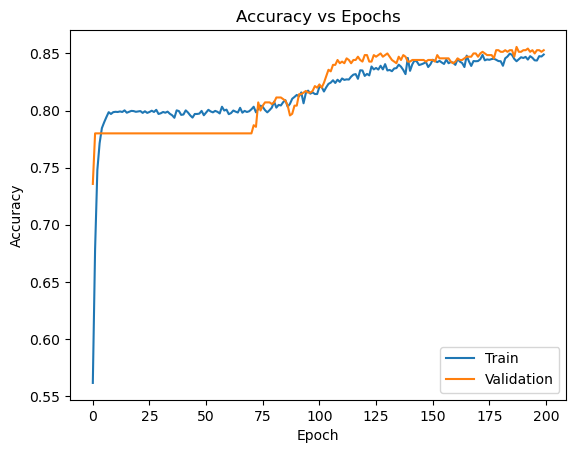

In [99]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [100]:
predictions = model.predict(X_test)

94/94 [==============================] - 0s 479us/step


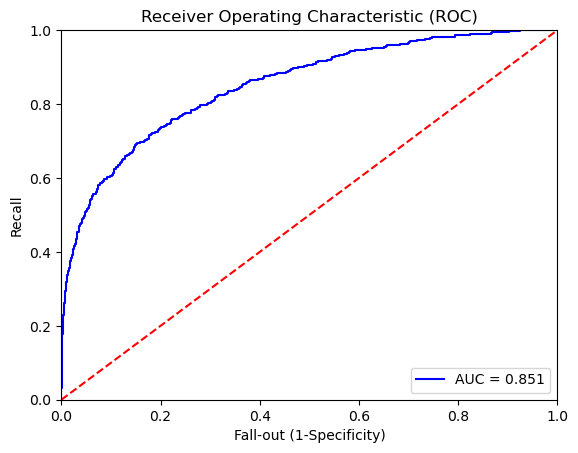

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

94/94 [==============================] - 0s 409us/step


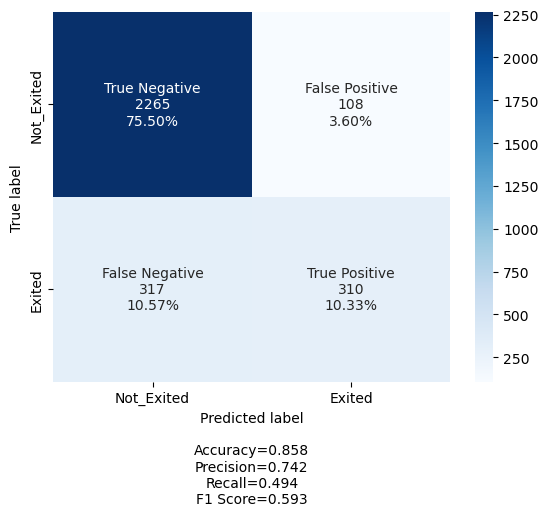

In [102]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

This model did manage to reduce the number of false negatives, which improved the recall score considerably. 

## Conclusion

* One important factor to note here is that the data provided to us was very imbalanced in terms of the target variable. There were far more negatives than positives. Possibly to improve the model, upsampling can be done to make the data more balanced.

* Overall, the model that we created will be useful to the bank in terms of predicting whether a customer will leave in the next 6 months. 